# HW8. Perceptron

1. 퍼셉트론을 이용해 xor 연산자를 만드세요. (은닉층 1개) \\
1) 에포크수 Nep=4000, 학습률을 0.01으로 설정하여 퍼셉트론을 학습시키세요. 활성함수는 g(x)=x를 사용하세요. 결과를 출력하여 알맞은 결과가 나왔는지 확인하세요. [20점] \\
2) 학습된 퍼셉트론의 confidence map을 X=np.arange(0, 1.1, 0.1), Y=np.arange(0, 1.1, 0.1)에서 그리세요. [20점] \\
3) 퍼셉트론이 잘 학습되지 않았다면, 왜 그런지 생각해보세요.

[1 1] 0 [[0.50443139]]
[1 0] 1 [[0.50094981]]
[0 1] 1 [[0.50315844]]
[0 0] 0 [[0.49967686]]


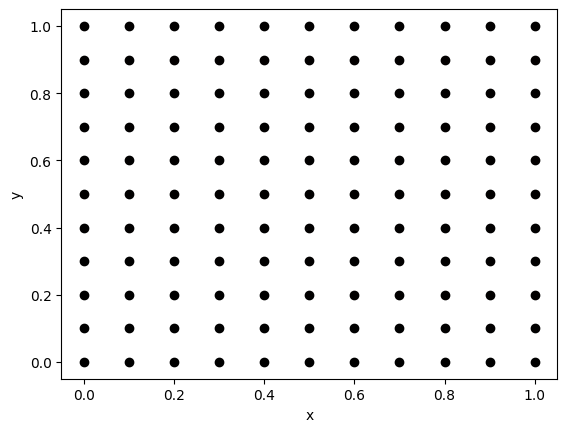

In [3]:
import numpy as np
import matplotlib.pyplot as plt

N=4
Nep=4000
alpha=0.01

def g(x):
    return x

x_train=np.array([[1,1],[1,0], [0,1], [0,0]])
d_train=np.array([0,1,1,0])
e=np.zeros(4)

w=np.random.random((2,2))
b=np.random.random((2,1))
V=np.random.random((1,2))
c=np.random.rand()

for ep in range(Nep):
    for n in range(N):
        x=np.reshape(x_train[n],(2,1))
        d=d_train[n]

        v=w@x+b; y=g(v)
        s=V@y+c; z=g(s)
        e=d-z

        delta=e
        el=V.T@delta
        epsil=el

        V+=alpha*delta*y.T; c+=alpha*delta
        w+=alpha*epsil@x.T; b+=alpha*epsil


for n in range(N):
    x=np.reshape(x_train[n],(2,1))
    d=d_train[n]
    v=w@x+b; y=g(v)
    s=V@y+c; z=g(s)
    print(x_train[n],d_train[n],z)


X=np.arange(0,1.1,0.1); Y=np.arange(0,1.1,0.1)
for dx in X:
    for dy in Y:
        x=np.reshape([dx,dy],(2,1))
        v=w@x+b; y=g(v)
        s=V@y+c; z=g(s)
        z=np.ndarray.item(z)
        if round(z): label=[2*(z-0.5),0,0]
        else: label=[0, 2*(0.5-z), 0]
        plt.scatter(dx,dy,color=label)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

위의 코드는 퍼셉트론을 이용해 xor 연산자를 구현한 뒤 학습된 퍼셉트론의 결괏값 및 confidence map을 그리는 코드이다. \\
변수 N은 학습 데이터의 샘플수를 나타내며, 4로 설정하였다. 변수 Nep은 에포크의 수를 나타내며 문제에서 주어진대로 4000으로 설정하였으며, 변수 alpha는 학습률을 나타내고 문제에서 주어진대로 0.01으로 설정하였다. \\
사용자 정의 함수 g는 활성함수를 의미하며, 문제에서 주어진대로 x를 입력받아 x값을 그대로 반환한다. 배열 x_train은 학습데이터로, xor게이트를 구현하기 위해 [1,1], [1,0], [0,1], [0,0]의 값으로 구성되어 있다. 배열 d_train은 정답데이터로,xor 게이트의 출력값인 [0,1,1,0]값이 저장되어 있다. 변수 w는 입력층과 은닉층 사이의 가중치 벡터이며, (2,2)의 크기를 가지도록 설정하였다. 변수 b는 은닉층의 바이어스 값으로 (2,1)크기의 임의의 값으로 지정하였다. 변수 V는 은닉층과 출력층 사이의 가중치 행렬로 (1,2)의 크기를 갖도록 설정하였다. 변수 c는 출력층의 바이어스를 의미한다. \\
이후 for문을 통해 에포크의 수 만큼 학습과정을 반복시켜 퍼셉트론을 학습시켰다. x는 x_train의 n번째 학습데이터를 저장하고, d는 d_train의 n번째 정답데이터를 저장한다. 변수 v는 입력층에서 은닉층으로의 뉴련의 입력합산값을 나타내며, y는 활성 함수를 통과한 출력값을 나타낸다. 변수 s는 은닉층에서 출력층으로의 뉴런의 입력합산값을 나타내며, 변수 z는 활성 함수를 통과한 최종 출력값을 나타낸다. 변수 e는 참값(d)과 z값의 차이를 저장한다. \\
이후 경사하강법을 이용해 w, b, V, c값을 업데이트 한다. 코드내의

```
        delta=e
        el=V.T@delta
        epsil=el

        V+=alpha*delta*y.T; c+=alpha*delta
        w+=alpha*epsil@x.T; b+=alpha*epsil
```
는 퍼셉트론 학습과정의 $$V_{ij} \rightarrow V_{ij}+ \alpha \delta_iy_j \\ c_i \rightarrow c_i + \alpha\delta_i \\ W_{ij} \rightarrow +\alpha \epsilon_i x_j \\ b_i \rightarrow b_i+\alpha \epsilon_i$$
과정을 의미한다. \\
퍼셉트론의 학습과정이 끝난 뒤 for문을 활용해 학습된 퍼셉트론 모델이 학습데이터 x_train에 대해 계산된 결과 z를 출력하도록 하였으며, 학습된 퍼셉트론의 confidence map을 나타내었다. 이때 출력값이 true이면 빨간색, false이면 초록색이 출력되도록 하였다. 위의 과정을 통해 도출한 결괏값 z의 경우 모든 출력값이 약 0.5의 값을 가진다는 사실을 통해 퍼셉트론의 학습이 제대로 이루어지지 않았음을 확인할 수 있으며, confidence map 역시 모두 검정색으로 표시된 것으로 보아 퍼셉트론이 제대로 학습되지 않음을 알 수 있었다. \\
퍼셉트론이 제대로 학습되지 않은 이유로는 먼저 활성화 함수의 문제를 들 수 있다. 일반적으로 퍼셉트론의 학습에 사용되는 시그모이드 함수는 입력되는 대부분의 값에서 출력이 0 또는 1로 수렴하는 경향성을 보이기에 이진 분류를 하는데 있어 효율적으로 분류가 가능하지만, 본 코드에서 사용된 활성함수 g(x)=x는 이진 분류가 되지않고 입력값에 따라 출력값이 변하는 문제가 있기에 퍼셉트론의 학습에 있어 적합하지 않다. 두번째로 학습률이 0.01로 너무 작아 주어진 epoch의 수만 가지고는 퍼셉트론의 학습이 충분히 되지 않았을 가능성이 존재한다. 이 문제를 해결하기 위해서는 epoch의 수를 충분히 늘려 퍼셉트론이 더욱 많은 학습단계를 거치도록 하는 방안이 존재할 수 있다.

2. 퍼셉트론을 이용해 xor 연산자를 만드세요. (하나의 은닉층 포함, 2개의 출력 노드) \\
1) 에포크수 Nep=4000, 학습률을 0.5으로 설정하여 퍼셉트론을 학습시키세요. (참: [1,1], 거짓: [0,0]) 활성함수는 시그모이드 함수를 이용하세요. 결과를 출력하여 알맞은 결과가 나왔는지 확인하세요. [30점] \\
2) 학습된 퍼셉트론의 confidence map을 X=np.arange(0, 1.1, 0.1), Y=np.arange(0, 1.1, 0.1)에서 그리세요. [20점] \\

[1 1] [0 0] [[0.02845717]
 [0.02839045]]
[1 0] [1 1] [[0.96360859]
 [0.96368818]]
[0 1] [1 1] [[0.97073498]
 [0.97080491]]
[0 0] [0 0] [[0.03099424]
 [0.03092359]]


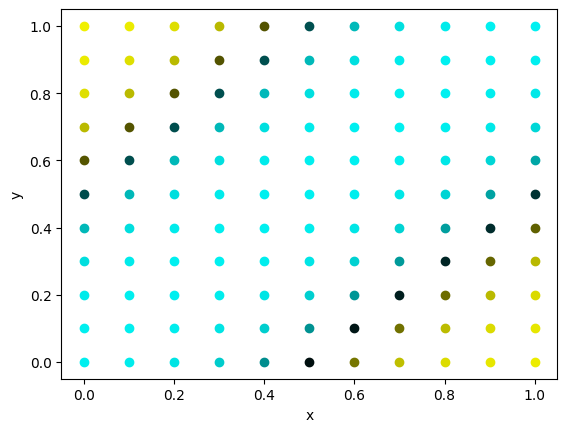

In [1]:
import numpy as np
import matplotlib.pyplot as plt

N=4
Nep=4000
alpha=0.5

def g(x):
  return 1.0/(1.0+np.exp(-x))

x_train=np.array([[1,1],[1,0], [0,1], [0,0]])
d_train=np.array([[0,0],[1,1],[1,1],[0,0]])
e=np.zeros(4)

w=np.random.random((2,2))
b=np.random.random((2,1))
V=np.random.random((2,2))
c=np.random.rand()

for ep in range(Nep):
    for n in range(N):
        x = np.reshape(x_train[n],(2,1))
        d = np.reshape(d_train[n],(2,1))

        v=w@x+b; y=g(v)
        s=V@y+c; z=g(s)
        e=d-z

        delta=z*(1-z)*e
        el=V.T@delta
        epsil=y*(1-y)*el

        V+=alpha*delta*y.T; c+=alpha*delta
        w+=alpha*epsil@x.T; b+=alpha*epsil


for n in range(N):
    x=np.reshape(x_train[n],(2,1))
    d=np.reshape(d_train[n],(2,1))
    v=w@x+b; y=g(v)
    s=V@y+c; z=g(s)
    print(x_train[n],d_train[n],z)


X=np.arange(0,1.1,0.1); Y=np.arange(0,1.1,0.1)
for dx in X:
    for dy in Y:
        x = np.reshape([dx,dy],(2,1))

        v=w@x+b; y=g(v)
        s=V@y+c; z=g(s)
        confidence1 = np.ndarray.item(z[0])
        confidence2 = np.ndarray.item(z[1])
        if round(confidence1):
          label1=[2*(confidence1-0.5),0,0]
        else:
          label1=[0, 2*(0.5-confidence1), 0]
        if round(confidence2):
          label2=[0, 2*(confidence2-0.5),0]
        else:
          label2=[0, 0, 2*(0.5-confidence2)]
        label = np.array(label1)+np.array(label2)
        plt.scatter(dx,dy,color=label)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

위의 코드는 퍼셉트론을 이용해 xor 연산자를 구현한 뒤 학습된 퍼셉트론의 결괏값 및 confidence map을 그리는 코드이다. \\
변수 N은 학습 데이터의 샘플수를 나타내며, 4로 설정하였다. 변수 Nep은 에포크의 수를 나타내며 문제에서 주어진대로 4000으로 설정하였으며, 변수 alpha는 학습률을 나타내고 문제에서 주어진대로 0.5으로 설정하였다. \\
사용자 정의 함수 g는 시그모이드 함수를 의미하며, 문제에서 주어진대로 x를 입력받아 $\dfrac{1}{1-e^{-x}}$값을 반환한다. 배열 x_train은 학습데이터로, xor게이트를 구현하기 위해 [1,1], [1,0], [0,1], [0,0]의 값으로 구성되어 있다. 배열 d_train은 정답데이터로,xor 게이트의 출력값인 [[0,0], [1,1], [1,1] ,[0,0]]값이 저장되어 있다. 변수 w는 입력층과 은닉층 사이의 가중치 벡터이며, (2,2)의 크기를 가지도록 설정하였다. 변수 b는 은닉층의 바이어스 값으로 (2,1)크기의 임의의 값으로 지정하였다. 변수 V는 은닉층과 출력층 사이의 가중치 행렬로 (1,2)의 크기를 갖도록 설정하였다. 변수 c는 출력층의 바이어스를 의미한다. \\
이후 for문을 통해 에포크의 수 만큼 학습과정을 반복시켜 퍼셉트론을 학습시켰다. x는 x_train의 n번째 학습데이터를 저장하고, d는 d_train의 n번째 정답데이터를 저장한다. 변수 v는 입력층에서 은닉층으로의 뉴련의 입력합산값을 나타내며, y는 시그모이드 함수를 통과한 출력값을 나타낸다. 변수 s는 은닉층에서 출력층으로의 뉴런의 입력합산값을 나타내며, 변수 z는 시그모이드 함수를 통과한 최종 출력값을 나타낸다. 변수 e는 참값(d)과 z값의 차이를 저장한다. \\
이후 경사하강법을 이용해 w, b, V, c값을 업데이트 한다. 코드내의

```
        delta=z*(1-z)*e
        el=V.T@delta
        epsil=y*(1-y)*el

        V+=alpha*delta*y.T; c+=alpha*delta
        w+=alpha*epsil@x.T; b+=alpha*epsil
```
는 퍼셉트론 학습과정의 $$V_{ij} \rightarrow V_{ij}+ \alpha \delta_iy_j \\ c_i \rightarrow c_i + \alpha\delta_i \\ W_{ij} \rightarrow +\alpha \epsilon_i x_j \\ b_i \rightarrow b_i+\alpha \epsilon_i$$
과정을 의미한다. \\
퍼셉트론의 학습과정이 끝난 뒤 for문을 활용해 학습된 퍼셉트론 모델이 학습데이터 x_train에 대해 계산된 결과 z를 출력하도록 하였으며, 학습된 퍼셉트론의 confidence map을 나타내었다. \\
이때 출력 노드의 첫번째 원소를 confidence1, 출력 노드의 2번째 원소를 confidence2에 저장하였다. 이후 confidence1의 경우에는 true이면 빨간색, false이면 초록색이 출력되도록 RGB값을 label1에 저장하였으며, confidence2의 경우에는 true이면 초록색, false이면 파란색이 출력되도록 RGB값을 label2에 저장하였다. 최종적으로 label1과 label2를 더한값인 label을 바탕으로 confidence map의 색깔을 설정하였다. 이를 통해 퍼셉트론의 출력값이 [1,1]일 경우에는 빨간색과 초록색이 합쳐진 노란색이, 출력값이 [0,0]일 경우에는 초록색과 파란색이 합쳐진 시안색이 출력되도록 하였다. \\
위의 과정을 통해 도출된 결괏값 z의 경우 입력이 [1,1]이거나 [0,0]일때는 약 [0,0]에 가까운 출력값이 도출되며, 입력이 [0,1]이거나 [1,0]일때는 약 [1,1]에 가까운 출력값이 도출되는 사실로 부터 xor 연산자에 대한 퍼셉트론이 잘 학습되었음을 확인할 수 있다. 또한 confidence map 또한 [0,0]과 [1,1]에서는 시안색을, [0,1]과 [1,0]에서는 노란색이 출력되는것으로 보아 퍼셉트론이 잘 학습되었음을 확인할 수 있다.